# ML Term Paper - Code: Models
by Ann-Christin and Sarah 15/02/2021

## 1. Preparation

In [1]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split


from sklearn import ensemble
from sklearn import tree as tree

#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
import os
path = "E:\Data\krea\PIAAC"
os.chdir(path)
print("done")
data = pd.read_csv("data/piaac_red.csv", sep=',', error_bad_lines=False, index_col=False)
data.shape

done


E:\Anaconda3\envs\base-krea\lib\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (1,2,5,6,13,19,24,26,27,30,32,33,40,49,52,59,60,61,64,65,67,70,77,86,87,88,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(230691, 133)

In [3]:
data.describe()

,Unnamed: 0,inpiaac,seqid,age_r,j_q03b,j_q03b_c,racethn_5cat,yrsqual,yrsqual_t,yrsget,...,readytolearn,icthome,ictwork,earnmthallppp,earnmthbonusppp,earnmthselfppp,nfehrsnjr,nfehrsjr,nfehrs,unempflag
count,230691.000000,3660.000000,230691.000000,166949.000000,103091.000000,144543.000000,3472.000000,218593.000000,213568.000000,125736.000000,...,226734.000000,171755.000000,102478.000000,8.850800e+04,7.677600e+04,11732.000000,54687.000000,54687.000000,80121.000000,3477.000000
mean,115345.000000,0.900546,4401.442982,39.687485,2.258296,2.165992,2.247408,12.536184,12.546814,12.567069,...,2.037301,2.028157,2.016022,3.157575e+03,3.259009e+03,2493.775348,55.298554,84.441805,140.938755,0.039689
std,66594.899812,0.299311,4735.160301,14.302125,1.264413,0.940666,0.982485,3.289158,3.300026,3.516878,...,1.024525,1.008360,1.021538,6.821093e+04,7.313718e+04,9771.976917,198.082778,196.587656,301.342789,0.195257
min,0.000000,0.000000,1.000000,16.000000,1.000000,1.000000,1.000000,3.000000,3.000000,0.000000,...,-1.074991,-1.209050,0.008980,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57672.500000,1.000000,1649.000000,27.000000,1.000000,1.000000,2.000000,11.000000,11.000000,11.000000,...,1.355049,1.338901,1.210520,9.259300e+02,1.016686e+03,200.162500,0.000000,9.000000,16.000000,0.000000
50%,115345.000000,1.000000,3298.000000,39.000000,2.000000,2.000000,2.000000,12.000000,12.000000,13.000000,...,1.992110,2.088670,1.854941,1.790609e+03,1.864409e+03,1014.449100,0.000000,30.000000,40.000000,0.000000
75%,173017.500000,1.000000,5008.000000,52.000000,3.000000,3.000000,2.000000,15.000000,15.000000,15.000000,...,2.588965,2.683840,2.624086,3.177483e+03,3.212351e+03,2827.312600,20.000000,80.000000,112.000000,0.000000
max,230690.000000,1.000000,27285.000000,65.000000,25.000000,4.000000,6.000000,23.000000,23.000000,23.000000,...,4.643640,7.710160,5.463352,1.187756e+07,1.187756e+07,856174.200000,1920.000000,1920.000000,1920.000000,1.000000


In [4]:
data.head()


,Unnamed: 0,cntry,cntry_e,inpiaac,seqid,cnt_brth,birthrgn,ageg10lfs,age_r,gender_r,...,nfe12jr,nfe12njr,fnfaet12,fnfaet12jr,fnfaet12njr,nfehrsnjr,nfehrsjr,nfehrs,nopaidworkever,unempflag
0,0,USA,USA,1.0,9355.0,NaN,NaN,NaN,NaN,Male,...,Did not participate in NFE for JR reasons,Did not participate in NFE for NJR reasons,Did not participate in formal or non-formal AET,Did not participate in formal or non-formal AE...,Did not participate in formal or non-formal AE...,NaN,NaN,NaN,Has had paid work,0.0
1,1,USA,USA,1.0,10882.0,NaN,NaN,NaN,NaN,Male,...,Participated in NFE for JR reasons,Did not participate in NFE for NJR reasons,Participated in formal and/or non-formal AET,Participated in formal or non-formal AET for J...,Did not participate in formal or non-formal AE...,0.0,30.0,30.0,Has had paid work,0.0
2,2,USA,USA,1.0,12329.0,NaN,NaN,NaN,NaN,Female,...,Did not participate in NFE for JR reasons,Did not participate in NFE for NJR reasons,Did not participate in formal or non-formal AET,Did not participate in formal or non-formal AE...,Did not participate in formal or non-formal AE...,NaN,NaN,NaN,Has had paid work,0.0
3,3,USA,USA,1.0,10711.0,NaN,NaN,NaN,NaN,Female,...,Participated in NFE for JR reasons,Did not participate in NFE for NJR reasons,Participated in formal and/or non-formal AET,Participated in formal or non-formal AET for J...,Did not participate in formal or non-formal AE...,NaN,NaN,8.0,Has had paid work,0.0
4,4,USA,USA,1.0,10383.0,NaN,NaN,NaN,NaN,Male,...,Participated in NFE for JR reasons,Did not participate in NFE for NJR reasons,Participated in formal and/or non-formal AET,Participated in formal or non-formal AET for J...,Did not participate in formal or non-formal AE...,0.0,80.0,80.0,Has had paid work,0.0


In [5]:
# data cleaning, drop variables that have too few observations,are not relevant or collinear
dcl = data.drop(columns = ['Unnamed: 0', 'cntry', 'cntry_e', 'inpiaac', "racethn_5cat", "unempflag", "racethn_5cat", "c_q08c2", "seqid", "b_q04b", "b_q19a", 
                         "c_q08c2", "learnatwork", "nfehrsnjr", "nfehrsjr", "nfehrs", "earnmthselfppp", "d_q05b2", 
                          "yrsqual_t", "earnmthbonusppp",  "d_q16d5", "c_q02c", "isco1c", "c_d09", "isic1l", "cnt_h", "isced_hf", "isco1l", "isco1c", "c_d05",
                          'icthome','ictwork','b_q01a','b_q01a_t','yrsqual','ageg10lfs','cnt_brth','fnfaet12jr', 'fe12', 'aetpop', 'faet12', 'faet12jr', 'faet12njr', 'nfe12', 'nfe12jr', 'nfe12njr', 'fnfaet12', 'fnfaet12jr', 'fnfaet12njr']) # exlude those to test the results 
#"isic2l", "isic2c", "isic_cus_c", "isic_lus_c", "isic4_c", "isic4_l",



dcl = dcl.loc[:, ~dcl.columns.str.endswith('_c')]
#drop if skill level is missing 
#dcl = dcl[dcl.iscoskil4 != "A"]
#dcl = dcl[dcl.iscoskil4 != "N"]
#dcl = dcl[dcl.iscoskil4 != "U"]

In [6]:
dcl['d_q05a2'] = dcl['d_q05a2'].astype('object')

In [7]:
#thresh = len(dcl) * .18
#dcl.dropna(thresh = thresh, axis = 1, inplace = True)
dcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Data columns (total 79 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   birthrgn            186710 non-null  object 
 1   age_r               166949 non-null  float64
 2   gender_r            230689 non-null  object 
 3   j_q03b              103091 non-null  float64
 4   j_q04a              228012 non-null  object 
 5   pared               215610 non-null  object 
 6   computerexperience  227980 non-null  object 
 7   yrsget              125736 non-null  float64
 8   vet                 102508 non-null  object 
 9   edcat8              188436 non-null  object 
 10  leaver1624          43455 non-null   object 
 11  b_q01b              168921 non-null  object 
 12  b_q02a              228146 non-null  object 
 13  b_q02a_t1           223151 non-null  object 
 14  b_q02a_t2           223143 non-null  object 
 15  b_q04a              183657 non-nul

In [8]:
cate = dcl.select_dtypes(include=['object'])
cate = cate.drop(columns = ["iscoskil4"]) 
cate = list(set(cate))
cate

['d_q06b',
 'j_q04a',
 'nopaidworkever',
 'computerexperience',
 'd_q09',
 'b_q12c',
 'j_q03a',
 'd_q05a2',
 'b_q14a',
 'b_q15c',
 'b_q02a_t2',
 'c_d06',
 'isic1c',
 'g_q05g',
 'g_q04',
 'b_d12h',
 'd_q04',
 'f_q07a',
 'h_q05g',
 'd_q06a',
 'd_q07a',
 'g_q06',
 'b_q16',
 'b_q20b',
 'b_q15a',
 'g_q08',
 'pared',
 'b_q04a',
 'b_q01b',
 'b_q10b',
 'b_q14b',
 'b_q02a',
 'd_q12a',
 'b_q13',
 'edcat8',
 'g_q05f',
 'b_q10c',
 'b_q11',
 'b_q05c',
 'b_q02a_t1',
 'g_q05e',
 'b_q12g',
 'd_q14',
 'vet',
 'd_q12c',
 'd_q03',
 'g_q07',
 'd_q12b',
 'b_q26a_t',
 'b_q26b',
 'g_q05d',
 'gender_r',
 'd_q04_t',
 'b_q10a',
 'd_q06c',
 'd_q13c',
 'birthrgn',
 'b_q12a',
 'b_q15b',
 'b_q12e',
 'g_q05c',
 'g_q05h',
 'g_q05a',
 'f_q07b',
 'c_q02a',
 'leaver1624']

In [9]:
# generate dummies                
dummies1 = [pd.get_dummies(dcl[i], prefix=i, drop_first = True) for i in [cate]]
dummies2 =  [pd.get_dummies(dcl["iscoskil4"], prefix="skill")] 
dummies1 = dummies1.pop(0)
dummies1

,d_q06b_Increased,d_q06b_Stayed more or less the same,j_q04a_Yes,nopaidworkever_Has not has paid work ever,computerexperience_Yes,d_q09_A temporary employment agency contract,d_q09_An apprenticeship or other training scheme,d_q09_An indefinite contract,d_q09_No contract,d_q09_Other,...,g_q05h_Less than once a month,g_q05h_Less than once a week but at least once a month,g_q05h_Never,g_q05a_Every day,g_q05a_Less than once a month,g_q05a_Less than once a week but at least once a month,g_q05a_Never,f_q07b_Yes,c_q02a_Yes,"leaver1624_Not in education, did not complete ISCED 3, aged 16 to 24"
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230686,0,1,1,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
230687,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
230688,1,0,1,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
230689,1,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
# generate dummies                
dummies1 = [pd.get_dummies(dcl[i], prefix=i, drop_first = True) for i in [cate]]
dummies2 =  [pd.get_dummies(dcl["iscoskil4"], prefix="skill")] 
dummies1 = dummies1.pop(0)
dummies1 = pd.DataFrame(dummies1)
dummies2 = dummies2.pop(0)
dummies2 = pd.DataFrame(dummies2)
dummies = dummies1.join(dummies2)
dummies = dummies.drop(columns = ["skill_4","skill_U", "skill_A", "skill_N", "isic1c_9995", "isic1c_9996", "isic1c_9997", "isic1c_9998", "isic1c_9999"])
dummies.head()
dummies.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Columns: 271 entries, d_q06b_Increased to skill_3
dtypes: uint8(271)
memory usage: 59.6 MB


In [11]:
num = dcl.select_dtypes(include=['float64', "int32"])
num = num.loc[:, ~num.columns.str.startswith('b_q12')]

In [12]:
num.head()
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   age_r          166949 non-null  float64
 1   j_q03b         103091 non-null  float64
 2   yrsget         125736 non-null  float64
 3   c_q09          160575 non-null  float64
 4   c_q10a         147420 non-null  float64
 5   d_q16b         71135 non-null   float64
 6   readytolearn   226734 non-null  float64
 7   earnmthallppp  88508 non-null   float64
dtypes: float64(8)
memory usage: 14.1 MB


In [13]:
num_list = list(set(num))
num_list

['earnmthallppp',
 'j_q03b',
 'age_r',
 'c_q09',
 'c_q10a',
 'readytolearn',
 'yrsget',
 'd_q16b']

In [14]:
# define X and y
on_job = dcl["b_q12d"] #define y here
open_educ = dcl["b_q12b"]
X = num.join(dummies)
X = pd.DataFrame(np.ascontiguousarray(X.values), columns = X.columns)
y = pd.DataFrame(dict(on_job=on_job, open_educ =open_educ))
y_X = y.join(X)
y_X

,on_job,open_educ,age_r,j_q03b,yrsget,c_q09,c_q10a,d_q16b,readytolearn,earnmthallppp,...,g_q05a_Every day,g_q05a_Less than once a month,g_q05a_Less than once a week but at least once a month,g_q05a_Never,f_q07b_Yes,c_q02a_Yes,"leaver1624_Not in education, did not complete ISCED 3, aged 16 to 24",skill_1,skill_2,skill_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016017,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,2.164922,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.177736,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.112932,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.064464,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230686,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,1.177736,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
230687,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,2.156445,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230688,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,2.383062,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
230689,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,1.751830,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
on_job.describe()

count    46750.000000
mean         3.252021
std          4.441589
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: b_q12d, dtype: float64

In [16]:
open_educ.describe()

count    16053.000000
mean         2.517660
std          3.785557
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         50.000000
Name: b_q12b, dtype: float64

## 2. OLS
### 2.1 OLS 'on the job training'

In [19]:
# run OLS on job
import statsmodels.api as sm

nona = y_X.drop(columns = ["open_educ"])
nona = nona.dropna()
nona = nona.loc[:, (nona != 0).any(axis=0)] 
y = nona["on_job"]
X = nona.iloc[:, 1:]
nona.describe()

,on_job,age_r,j_q03b,yrsget,c_q09,c_q10a,d_q16b,readytolearn,earnmthallppp,d_q06b_Increased,...,g_q05h_Never,g_q05a_Every day,g_q05a_Less than once a month,g_q05a_Less than once a week but at least once a month,g_q05a_Never,f_q07b_Yes,"leaver1624_Not in education, did not complete ISCED 3, aged 16 to 24",skill_1,skill_2,skill_3
count,14761.000000,14761.00000,14761.000000,14761.000000,14761.000000,14761.000000,1.476100e+04,14761.000000,1.476100e+04,14761.000000,...,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000
mean,3.165910,44.05169,2.089967,13.598604,21.679967,1.654292,8.866738e+05,2.162716,3.452560e+03,0.217533,...,0.578958,0.619064,0.023372,0.025879,0.079602,0.420161,0.003252,0.555111,0.243208,0.140302
std,4.065259,9.85563,0.996760,2.893933,10.673398,1.480928,5.964246e+06,0.970411,1.431507e+04,0.412582,...,0.493743,0.485633,0.151088,0.158780,0.270685,0.493601,0.056934,0.496970,0.429034,0.347312
min,0.000000,18.00000,1.000000,4.000000,0.000000,1.000000,0.000000e+00,-1.074991,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,37.00000,1.000000,12.000000,13.000000,1.000000,1.700000e+03,1.540375,1.487970e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,44.00000,2.000000,14.000000,21.000000,1.000000,6.200000e+03,2.100496,2.598040e+03,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,52.00000,2.000000,16.000000,30.000000,2.000000,4.300000e+04,2.650352,4.091922e+03,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,50.000000,65.00000,21.000000,23.000000,55.000000,90.000000,1.500000e+08,4.643640,1.283951e+06,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:


est = sm.OLS(y, X, missing='drop').fit()
X = sm.add_constant(X)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 on_job   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     8.371
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          2.67e-274
Time:                        16:57:36   Log-Likelihood:                -40614.
No. Observations:               14761   AIC:                         8.175e+04
Df Residuals:                   14500   BIC:                         8.373e+04
Df Model:                         260                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================
                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
age_r                                                                                          -0.0403      0.007     -5.881      0.000      -0.054      -0.027
j_q03b                                                                                          0.0089      0.034      0.264      0.792      -0.057       0.075
yrsget                                                                                          0.0141      0.033      0.431      0.667      -0.050       0.078
c_q09                                                                                           0.0335      0.006      5.263      0.000       0.021       0.046
c_q10a                                                                                          0.0594      0.024      2.432      0.015       0.012       0.107
d_q16b                                                                                      -3.559e-09   6.01e-09     -0.592      0.554   -1.53e-08    8.23e-09
readytolearn                                                                                    0.1003      0.038      2.653      0.008       0.026       0.174
earnmthallppp                                                                                2.391e-06   2.23e-06      1.073      0.283   -1.98e-06    6.76e-06
d_q06b_Increased                                                                                0.0134      0.095      0.141      0.888      -0.172       0.199
d_q06b_Stayed more or less the same                                                            -0.0012      0.078     -0.016      0.987      -0.154       0.151
j_q04a_Yes                                                                                      0.0094      0.151      0.062      0.951      -0.287       0.306
computerexperience_Yes                                                                          0.0709      0.200      0.355      0.722      -0.320       0.462
d_q09_A temporary employment agency contract                                                    0.1134      0.320      0.355      0.723      -0.513       0.740
d_q09_An apprenticeship or other training scheme                                                0.8396      0.522      1.609      0.108      -0.183       1.862
d_q09_An indefinite contract                                                                   -0.1267      0.113     -1.124      0.261      -0.348       0.094
d_q09_No contract                                                                               0.1134      0.226      0.503      0.615      -0.329       0.556
d_q09_Other                                

### 2.2 OLS 'open education'

In [21]:
# run OLS open educ
import statsmodels.api as sm

nona = y_X.drop(columns = ["on_job"])
nona = nona.dropna()
nona = nona.loc[:, (nona != 0).any(axis=0)] 

y = nona["open_educ"]
X = nona.iloc[:, 2:]

est = sm.OLS(y, X, missing='drop').fit()
X = sm.add_constant(X)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              open_educ   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.161
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           1.29e-21
Time:                        16:58:37   Log-Likelihood:                -11138.
No. Observations:                4092   AIC:                         2.279e+04
Df Residuals:                    3836   BIC:                         2.441e+04
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================
                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
j_q03b                                                                                         -0.0800      0.068     -1.173      0.241      -0.214       0.054
yrsget                                                                                         -0.0788      0.070     -1.131      0.258      -0.216       0.058
c_q09                                                                                           0.0100      0.008      1.293      0.196      -0.005       0.025
c_q10a                                                                                          0.0367      0.052      0.709      0.478      -0.065       0.138
d_q16b                                                                                       1.966e-09   7.58e-09      0.259      0.795   -1.29e-08    1.68e-08
readytolearn                                                                                    0.1529      0.069      2.222      0.026       0.018       0.288
earnmthallppp                                                                               -2.671e-06   2.85e-06     -0.936      0.349   -8.27e-06    2.92e-06
d_q06b_Increased                                                                                0.0666      0.184      0.361      0.718      -0.295       0.428
d_q06b_Stayed more or less the same                                                             0.0504      0.153      0.329      0.742      -0.250       0.351
j_q04a_Yes                                                                                      0.2407      0.309      0.780      0.435      -0.364       0.846
computerexperience_Yes                                                                          0.1676      0.494      0.339      0.735      -0.801       1.137
d_q09_A temporary employment agency contract                                                    0.1638      0.605      0.271      0.786      -1.022       1.349
d_q09_An apprenticeship or other training scheme                                                0.8222      0.852      0.965      0.335      -0.848       2.492
d_q09_An indefinite contract                                                                    0.2821      0.209      1.348      0.178      -0.128       0.692
d_q09_No contract                                                                               0.9224      0.385      2.397      0.017       0.168       1.677
d_q09_Other                                                                                     0.1534      0.517      0.297      0.767      -0.860       1.167
b_q12c_Yes                                 

#### Interpretation of first OLS results
OLS of open education indicates that high-skilled are more likely compared to lower skilled occuopatons to participate in open education.
OLS of on the job training indicates that high-skilled are less likely to particpate comapred to low skill levels. However, the ceofficients are not significant for the open education. Possible problem might be collinearity in the data set. Using Machine Learning techniques like Lasso, we should be able to eliminate the irrelevant explanatory variables and get a better fit.


Get some insights by looking at the variable distributions and at the pairwise relationships between them. Only numerical variables will be used. In the following plot, each dot represents a sample.

import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
train_dataset = X_train.copy()
train_dataset.insert(0, "open_educ", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

## 3. Comparing OLS and LASSO

In [22]:
from sklearn.preprocessing import StandardScaler # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn.pipeline import Pipeline # https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFdr 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
print('done')

done


### 3.1 On the job training

In [39]:
nona = y_X.drop(columns = ["open_educ"])
nona = nona.dropna()
nona = nona.loc[:, (nona != 0).any(axis=0)] 

y = nona["on_job"]
X = nona.iloc[:, 1:]

X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
X = StandardScaler().fit_transform(X)

In [40]:
# Use K-fold out-of-sample validation to compare the predictive power of the full and of the reduced model
from sklearn.model_selection import KFold, cross_val_score


kf = KFold(n_splits=5, shuffle=True, random_state=1) # we use five splits, randam_state makes sure we can replacte the data (get same random numbers)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
scores_full = cross_val_score(pipe, X, y, cv=kf)
print("scores full")
print(scores_full)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_full.mean(), scores_full.std() * 2))

scores full
[-5.49264743e+53  8.43271710e-02  8.15501971e-02 -2.91077999e+51
 -2.07385649e+53]
Accuracy: -151912234379040054392857378451974237469388555776163840.00000 (+/- 428319883551848896883843588465763858333164931253272576.00000)


In [41]:
# optimal lasso penalty
from sklearn.linear_model import LassoCV
import time
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=5, max_iter=10000, alphas=np.logspace(-2.5, -0.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X, y)
t_cv = time.time() - t1
print("Ready")
l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.0295 
Training time =  11.7931s 


In [42]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
scores_lasso = cross_val_score(pipe, X, y, cv=kf)
print(scores_lasso)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso.mean(), scores_lasso.std() * 2))

[0.10463804 0.09953056 0.10203152 0.11165219 0.08937054]
Accuracy: 0.10144 (+/- 0.01454)


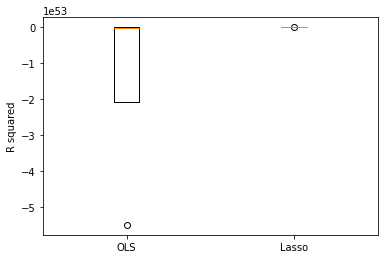

In [43]:
fig, ax = plt.subplots()
ax.boxplot([scores_full, scores_lasso])
plt.xticks([1, 2], ['OLS', 'Lasso'])
plt.ylabel('R squared')
#plt.title('Out-of-sample validation, smaller sample')
plt.savefig('plots\outofsample_validation_onJob.png', bbox_inches='tight')


NOTE: out-of-sample performance of Lasso model appears to be better--> less noise in the data and thus no overfitting.

### 3.2. Open Education

In [47]:
nona = y_X.drop(columns = ["on_job"])
nona = nona.dropna()

y = nona["open_educ"]
X = nona.iloc[:, 1:]

nona = nona.loc[:, (nona != 0).any(axis=0)] 

# Now let's apply Benjamini - Hochberg as a first attempt to regularise the model 
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
X = StandardScaler().fit_transform(X)

In [48]:
# ! it is more correct to perform FDR only on the train data, therefore it is inside the pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('fdr', SelectFdr(f_regression, alpha=0.1)),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set


In [49]:
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train)) #In sample fit decreases afte throughing out variables
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test)) # Out of sample fit decresaed

In-sample Rsq:  0.0801
Out-of-sample Rsq: -0.0064


E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [50]:
# Use K-fold out-of-sample validation to compare the predictive power of the full and of the reduced model
from sklearn.model_selection import KFold, cross_val_score

y = nona["open_educ"]
X = nona.iloc[:, 1:]

kf = KFold(n_splits=5, shuffle=True, random_state=1) # we use five splits, randam_state makes sure we can replacte the data (get same random numbers)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
scores_full = cross_val_score(pipe, X, y, cv=kf)
print("scores full")
print(scores_full)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_full.mean(), scores_full.std() * 2))

scores full
[-4.63864821e-02 -1.81092003e-01  8.52944631e-03 -1.31676159e+19
 -1.83311738e+20]
Accuracy: -39295870877027270656.00000 (+/- 144376597049797279744.00000)


In [52]:
# optimal lasso penalty
from sklearn.linear_model import LassoCV
import time
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=5, max_iter=10000, alphas=np.logspace(-2.5, -0.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X, y)
t_cv = time.time() - t1
print("Ready")
l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.1649 
Training time =  0.9619s 


In [53]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
scores_lasso = cross_val_score(pipe, X, y, cv=kf)
print(scores_lasso)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso.mean(), scores_lasso.std() * 2))

[0.03096948 0.03226355 0.02552566 0.02234608 0.02452786]
Accuracy: 0.02713 (+/- 0.00766)


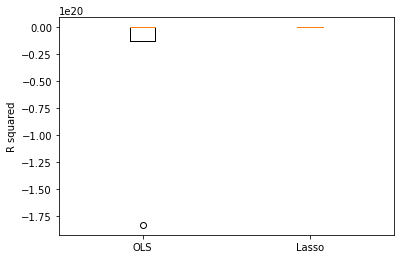

In [54]:
fig, ax = plt.subplots()
ax.boxplot([scores_full, scores_lasso])
plt.xticks([1, 2], ['OLS', 'Lasso'])
plt.ylabel('R squared')
#plt.title('Out-of-sample validation, open education')
plt.savefig('plots\outofsample_validation_openEduc.png', bbox_inches='tight')


## 4. Lasso
### 4.1 Lasso - on the job training

In [55]:
# Use K-fold out-of-sample validation to select the 'best' $\lambda$. Plot average out-of-sample error as a function of $\lambda$. 
# Note: can take some time
from sklearn.linear_model import LassoCV
import time

nona = y_X.drop(columns = ["open_educ"])
nona = nona.dropna()
nona = nona.loc[:, (nona != 0).any(axis=0)]

y = nona["on_job"]
X = nona.iloc[:, 1:]

 


X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) 


pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=0.05, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

In-sample Rsq:  0.1125
Out-of-sample Rsq:  0.0996


old result: 
In-sample Rsq:  0.1315
Out-of-sample Rsq:  0.0692

Computing regularization path using the lasso...
Ready


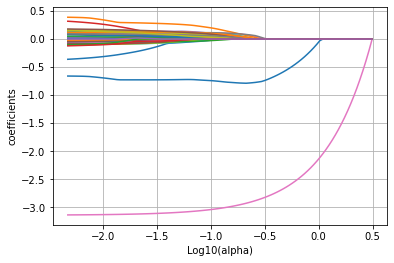

<Figure size 432x288 with 0 Axes>

In [56]:
# lasso path
from sklearn.linear_model import lasso_path, enet_path

X = StandardScaler().fit_transform(X_train) 
# Compute paths
eps = 0.0015 #the smaller it is the longer is the path; 0 = OLS. If it is very small: the model might not find a solution
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y_train, eps=eps, max_iter=10000, fit_intercept=True)
print("Ready")

plt.figure()
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log10(alpha)')
plt.ylabel('coefficients')
#plt.title('Lasso Path')
plt.axis('tight')
plt.grid(axis='both')
plt.show()

plt.savefig('plots\lasso_path_onJob.png', bbox_inches='tight')

Lasso Path shows the path of estimated coefficients for different values of $\lambda$. When $\lambda$ approaches zero, we are close to the OLS with all the variables. The path also shows us the $\lambda$ when all the coefficients are zero (null model). For this graph such $\lambda$ is around log(-1). It is helpful for the next step, when we define the search grid to find the optimal $\lambda$. 
#### Selecting optimal $\lambda$ with cross-validation and information criteria

In [57]:
from sklearn.linear_model import LassoCV
import time

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=10, max_iter=10000, alphas=np.logspace(-3, -2.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X_train, y_train)
t_cv = time.time() - t1
print("Ready")

l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.0032 
Training time =  9.7081s 


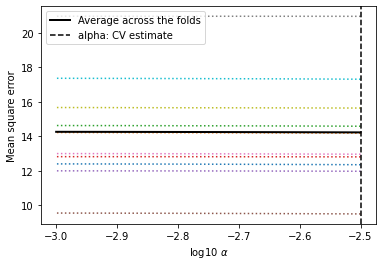

In [58]:
# Display results
log_alphas_lasso = np.log10(l.alphas_)

plt.figure()
plt.plot(log_alphas_lasso , l.mse_path_, ':')
plt.plot(log_alphas_lasso , l.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(l.alpha_) , linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'log10 $\alpha$')
plt.ylabel('Mean square error')
#plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')
plt.savefig('plots\lasso_MSE_fold_onJob.png', bbox_inches='tight')

MSE is almost constant for 10 folds.

In [59]:


pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

In-sample Rsq:  0.1316
Out-of-sample Rsq:  0.1041


In [60]:
# we can also check which coefficients were selected by LASSO 
pipe.named_steps['lasso'].coef_ # note the syntaxis pipe.named_steps

array([-3.74445924e-01,  2.32823776e-03,  8.48988371e-02,  3.33185926e-01,
        1.00456554e-01, -4.72962331e-02,  9.94657479e-02,  4.47102097e-02,
        1.47435649e-02, -2.37798693e-03,  5.35921884e-03, -0.00000000e+00,
        3.86903013e-02,  1.05768247e-01, -5.05701952e-02,  2.18851315e-02,
        3.15208434e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.25902128e-03, -0.00000000e+00, -1.16697410e-02, -0.00000000e+00,
       -1.72813837e-02, -3.50289113e-02, -2.89821572e-02,  4.69466080e-02,
       -4.76184122e-02, -2.29304384e-02, -1.52082199e-02, -5.21008437e-02,
        1.64791938e-02,  1.44486071e-02,  6.23596773e-03, -1.73908699e-02,
       -2.01987222e-02, -3.36002552e-02, -1.95384902e-03, -2.98888361e-02,
        2.43990374e-02, -1.93145436e-02, -5.27899370e-02, -1.58454505e-02,
       -5.18267286e-03, -1.28774933e-02,  1.38413723e-02,  4.26857341e-02,
        2.92309517e-02,  1.53283444e-02, -4.29257505e-02, -3.07980012e-03,
       -5.53487299e-02, -

In [65]:
imp = pd.DataFrame(pipe.named_steps['lasso'].coef_, columns = ['Lasso coefficient'])

imp

,Lasso coefficient
0,-0.374446
1,0.002328
2,0.084899
3,0.333186
4,0.100457
...,...
260,0.007068
261,-0.021912
262,-0.113354
263,-0.129262


In [61]:
imp = pd.DataFrame(pipe.named_steps['lasso'].coef_, columns = ['Lasso coefficient'])
imp['Feature'] = list(X_train.columns)
imp

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [66]:
index = imp[(imp['Lasso coefficient'] == 0)].index
imp.drop(index, inplace=True)
imp

,Lasso coefficient
0,-0.374446
1,0.002328
2,0.084899
3,0.333186
4,0.100457
...,...
260,0.007068
261,-0.021912
262,-0.113354
263,-0.129262


#### Lasso for open education

In [67]:
nona = y_X.drop(columns = ["on_job"])
nona = nona.dropna()

nona = nona.loc[:, (nona != 0).any(axis=0)]
y = nona["open_educ"]
X = nona.iloc[:, 2:]

In [69]:
# Use K-fold out-of-sample validation to select the 'best' $\lambda$. Plot average out-of-sample error as a function of $\lambda$. 
# Note: can take some time
from sklearn.linear_model import LassoCV
import time


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) 


pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=0.05, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

In-sample Rsq:  0.1073
Out-of-sample Rsq:  0.0167


Computing regularization path using the lasso...
Ready


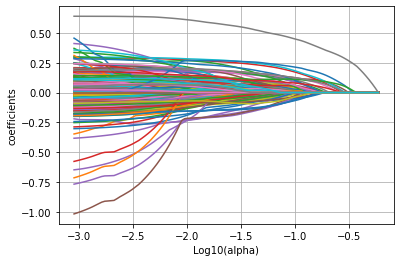

<Figure size 432x288 with 0 Axes>

In [70]:
# lasso path
from sklearn.linear_model import lasso_path, enet_path

X = StandardScaler().fit_transform(X_train) 
# Compute paths
eps = 0.0015 #the smaller it is the longer is the path; 0 = OLS. If it is very small: the model might not find a solution
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y_train, eps=eps, max_iter=10000, fit_intercept=True)
print("Ready")

plt.figure()
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log10(alpha)')
plt.ylabel('coefficients')
#plt.title('Lasso Path')
plt.axis('tight')
plt.grid(axis='both')
plt.show()

plt.savefig('plots\lasso_path_openeduc.png', bbox_inches='tight')

#### Selecting optimal $\lambda$ with cross-validation and information criteria

In [72]:
from sklearn.linear_model import LassoCV
import time

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=10, max_iter=10000, alphas=np.logspace(-3, -2.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X_train, y_train)
t_cv = time.time() - t1
print("Ready")

l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.0032 
Training time =  5.1611s 


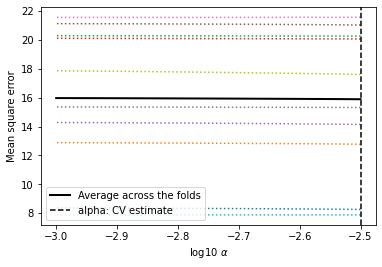

In [73]:
# Display results
log_alphas_lasso = np.log10(l.alphas_)

plt.figure()
plt.plot(log_alphas_lasso , l.mse_path_, ':')
plt.plot(log_alphas_lasso , l.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(l.alpha_) , linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'log10 $\alpha$')
plt.ylabel('Mean square error')
#plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')
plt.savefig('plots\lasso_MSE_fold_openeduc.png', bbox_inches='tight')

In [74]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

In-sample Rsq:  0.1448
Out-of-sample Rsq: -0.0341


In [75]:
# we can also check which coefficients were selected by LASSO 
pipe.named_steps['lasso'].coef_ # note the syntaxis pipe.named_steps

array([-8.75745700e-02, -2.05000436e-01,  1.53639556e-01, -9.12008467e-03,
        2.61199015e-02,  1.98811618e-01, -6.20183769e-02,  4.94256156e-02,
        1.28999816e-02, -0.00000000e+00,  8.40723833e-02,  6.31457189e-03,
        1.16620417e-01,  1.97553779e-01,  1.65941125e-01,  2.34697020e-02,
       -2.92459509e-02,  0.00000000e+00,  9.47481304e-03, -4.97317180e-02,
       -3.33429685e-03, -2.58452598e-02,  1.36717314e-01, -1.89055393e-02,
       -7.25648419e-02, -6.85151824e-02, -3.17322179e-02, -3.17572078e-02,
        5.91766760e-02,  1.41391914e-02,  3.95481595e-03,  7.97570136e-02,
       -2.03971234e-02,  2.48912029e-02,  4.84396365e-02, -2.43018623e-02,
       -4.40347365e-02, -4.62301182e-02, -1.30536254e-02, -7.39302111e-03,
       -1.79364677e-03, -3.90674920e-02,  2.06721638e-02, -2.17726215e-02,
        3.85301446e-02,  2.59870762e-02, -1.96722859e-02,  1.97718615e-01,
        3.25323521e-02,  3.50309484e-02, -5.91078382e-02, -0.00000000e+00,
       -7.66666160e-02,  

In [77]:
imp = pd.DataFrame(pipe.named_steps['lasso'].coef_, columns = ['Lasso coefficient'])
imp['Feature'] = list(X_train.columns)
imp

,Lasso coefficient,Feature
0,-0.087575,j_q03b
1,-0.205000,yrsget
2,0.153640,c_q09
3,-0.009120,c_q10a
4,0.026120,d_q16b
...,...,...
255,0.000000,f_q07b_Yes
256,0.021039,"leaver1624_Not in education, did not complete ..."
257,0.066650,skill_1
258,-0.077508,skill_2


In [78]:
index = imp[(imp['Lasso coefficient'] == 0)].index
imp.drop(index, inplace=True)
imp

,Lasso coefficient,Feature
0,-0.087575,j_q03b
1,-0.205000,yrsget
2,0.153640,c_q09
3,-0.009120,c_q10a
4,0.026120,d_q16b
...,...,...
254,-0.078774,g_q05a_Never
256,0.021039,"leaver1624_Not in education, did not complete ..."
257,0.066650,skill_1
258,-0.077508,skill_2


## 5. Random Forest 

### 5.1 Open Education

In [68]:

rf = ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 1, oob_score = True, \
        random_state = 1, max_features = int(X_train.shape[1]/3))
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
# Out-of-sample R-sq.
print('Out-of-sample Rsq: %.3f'
      % r2_score(y_test, y_pred))
print('Out-of-sample MSE: %.3f'
      % mean_squared_error(y_test, y_pred))

Out-of-sample Rsq: -0.005
Out-of-sample MSE: 15.329


In [69]:
# we can check whether we had enough trees in the forest
# Use cross-validation to determine the optimal number of trees
from sklearn.model_selection import cross_validate
import scipy as sp

def cv_iter(n, folds, X, y):
    kf = KFold(n_splits=folds, shuffle=True, random_state=1)
    rf = ensemble.RandomForestRegressor(n_estimators = n, min_samples_leaf = 1, \
        random_state = 1)
    cv_result = cross_validate(rf, X, y, scoring = 'neg_mean_squared_error')
    avg_score = np.mean(cv_result['test_score'])
    return float(-avg_score)

<AxesSubplot:xlabel='Number of trees'>

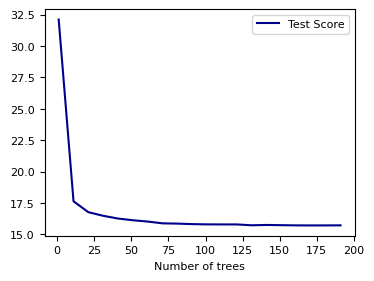

In [70]:


result = {}
for i in range(1, 200, 10):
    result[i] = cv_iter(i, 5, X_train, y_train)

plt.rcParams.update({'font.size': 8, 'figure.figsize': (4, 3), 'figure.dpi': 100})    
results = pd.DataFrame.from_dict(result,orient='index', columns = ['Test Score'])
results.plot(color = 'DarkBlue', xlabel = 'Number of trees')

# as we can see on the graph below, the MSE stabilizes with about 50 trees. 

In [71]:
# feature importance

imp = pd.DataFrame(rf.feature_importances_, columns = ['Feature importance'])
imp['Feature'] = list(X_train.columns)
imp.sort_values(by=['Feature importance'], ascending=False).reset_index(drop = True)


,Feature importance,Feature
0,0.041061,earnmthallppp
1,0.037765,age_r
2,0.032735,d_q16b
3,0.031783,readytolearn
4,0.023903,c_q09
...,...,...
279,0.000000,c_d06_Not known
280,0.000000,d_q05a2_2019.0
281,0.000000,"c_d06_Yes, unpaid work for family business"
282,0.000000,nopaidworkever_Has not has paid work ever


In [77]:
# put here the parameters for max_depth and min_samples_leaf that you determined in the previous step

cart = tree.DecisionTreeRegressor()
cart = cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)

# Out-of-sample R-sq.
print('Tree depth: %.0f' % cart.get_depth())
print('Out-of-sample Rsq: %.3f'
      % r2_score(y_test, y_pred))
print('Out-of-sample MSE: %.3f'
      % mean_squared_error(y_test, y_pred))

Tree depth: 58
Out-of-sample Rsq: -0.759
Out-of-sample MSE: 35.136


### 5.2 On the job training

In [94]:
nona = y_X.drop(columns = ["open_educ"])
nona = nona.dropna()
y = nona["on_job"]
X = nona.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) 

In [73]:

rf = ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 1, oob_score = True, \
        random_state = 1, max_features = int(X_train.shape[1]/3))
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
# Out-of-sample R-sq.
print('Out-of-sample Rsq: %.3f'
      % r2_score(y_test, y_pred))
print('Out-of-sample MSE: %.3f'
      % mean_squared_error(y_test, y_pred))

Out-of-sample Rsq: 0.086
Out-of-sample MSE: 18.247


In [95]:
# another random forest - but hte other some is better

rf = ensemble.RandomForestRegressor(n_estimators = 100, min_samples_leaf = 1, min_samples_split = 2, oob_score = True, \
        random_state = 1)
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
# Out-of-sample R-sq.
print('Out-of-sample Rsq: %.3f'
      % r2_score(y_test, y_pred))
print('Out-of-sample MSE: %.3f'
      % mean_squared_error(y_test, y_pred))

Out-of-sample Rsq: 0.071
Out-of-sample MSE: 18.550


In [74]:
# we can check whether we had enough trees in the forest
# Use cross-validation to determine the optimal number of trees
from sklearn.model_selection import cross_validate
import scipy as sp

def cv_iter(n, folds, X, y):
    kf = KFold(n_splits=folds, shuffle=True, random_state=1)
    rf = ensemble.RandomForestRegressor(n_estimators = n, min_samples_leaf = 1, \
        random_state = 1)
    cv_result = cross_validate(rf, X, y, scoring = 'neg_mean_squared_error')
    avg_score = np.mean(cv_result['test_score'])
    return float(-avg_score)

<AxesSubplot:xlabel='Number of trees'>

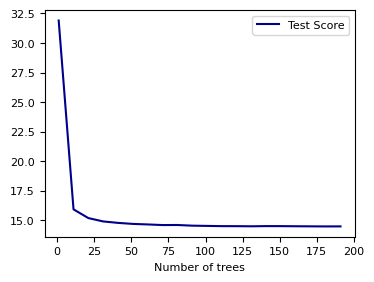

In [75]:
result = {}
for i in range(1, 200, 10):
    result[i] = cv_iter(i, 5, X_train, y_train)

plt.rcParams.update({'font.size': 8, 'figure.figsize': (4, 3), 'figure.dpi': 100})    
results = pd.DataFrame.from_dict(result,orient='index', columns = ['Test Score'])
results.plot(color = 'DarkBlue', xlabel = 'Number of trees')

# as we can see on the graph below, the MSE stabilizes with about 25 trees. 

In [76]:
# feature importance

imp = pd.DataFrame(rf.feature_importances_, columns = ['Feature importance'])
imp['Feature'] = list(X_train.columns)
imp.sort_values(by=['Feature importance'], ascending=False).reset_index(drop = True)


,Feature importance,Feature
0,0.051202,earnmthallppp
1,0.040601,b_d12h_Respondent reported 1 learning activity
2,0.040290,readytolearn
3,0.038752,d_q16b
4,0.030466,c_q09
...,...,...
278,0.000000,"d_q04_t_Self-employed, not supervisor"
279,0.000000,d_q05a2_2019.0
280,0.000000,d_q05a2_1963.0
281,0.000000,"c_d06_Yes, unpaid work for family business"


#### Regular Tree

In [78]:
# put here the parameters for max_depth and min_samples_leaf that you determined in the previous step

cart = tree.DecisionTreeRegressor()
cart = cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)

# Out-of-sample R-sq.
print('Tree depth: %.0f' % cart.get_depth())
print('Out-of-sample Rsq: %.3f'
      % r2_score(y_test, y_pred))
print('Out-of-sample MSE: %.3f'
      % mean_squared_error(y_test, y_pred))

Tree depth: 58
Out-of-sample Rsq: -0.718
Out-of-sample MSE: 34.302


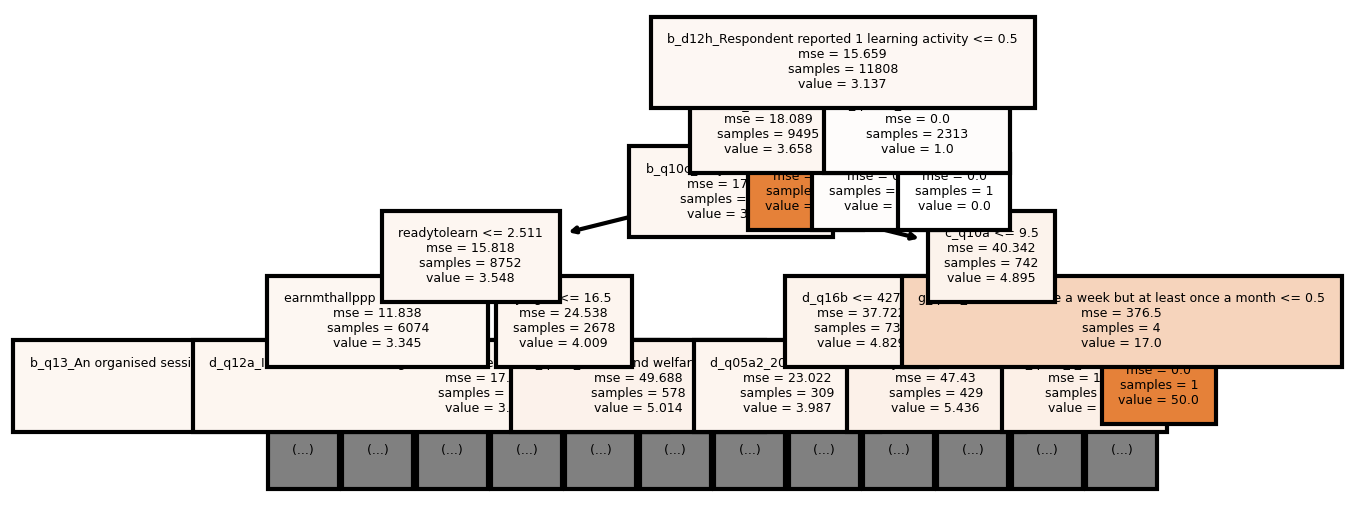

In [81]:
#dendrogram
plt.rcParams.update({'font.size': 8, 'figure.figsize': (4, 2), 'figure.dpi': 300})
tree.plot_tree(cart, max_depth = 5, filled = True, feature_names = list(X.columns),\
               fontsize = 3);

###  Pruning with Minimal Cost-Complexity

This pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. 
The goal is the find an optimal value of α which gives the maximum validation/test set accuracy.

- Parameter ccp_alpha provides a threshold for effective alphas, i.e. the process of pruning continues until the minimal effective alpha of the pruned tree is not greater than ccp_alpha. 

- The DecisionTreeClassifier class also provides a method cost_complexity_pruning_path which implements the pruning process and returns the effective alphas(and the corresponding impurities of there pruned trees)

In [87]:
# Complexity path 
cart = tree.DecisionTreeRegressor(random_state = 1)

path = cart.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

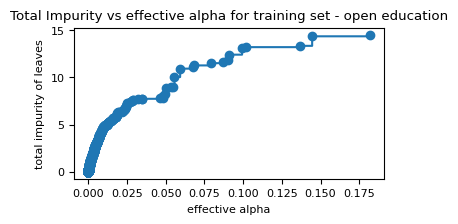

In [89]:
plt.rcParams.update({'font.size': 8, 'figure.figsize': (4, 2), 'figure.dpi': 100})
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set - open education")
plt.savefig('plots\costcomplexPruning_openeduc.png', bbox_inches='tight')
# Based on this graph, where would you expect the optimal alpha to be? 

As it is evident from the above plot, a value of alpha close to 0 corresponds to minimum impurity(unpruned tree) and as the value of alpha becomes larger the tree tends to be more impure.

In [90]:
# we define a function for cross-validation
def cv_iter(alpha, folds, X, y):
    cart = tree.DecisionTreeRegressor(ccp_alpha = alpha)
    cv_result = cross_validate(cart, X, y, scoring = 'neg_mean_squared_error')
    avg_score = np.mean(cv_result['test_score'])
    return float(-avg_score)

9.000000000000002e-05

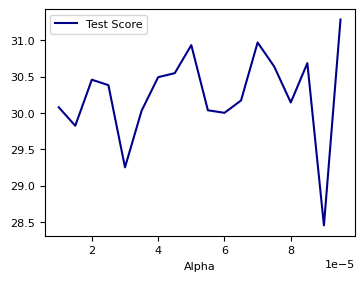

In [91]:
# attention: this CV takes some time, as we are fitting many forests, would suggest doing this in the very end... 
result = {}
for i in np.arange(0.00001, 0.0001, 0.000005): # you can also try a different grid for search 
    result[i] = cv_iter(i, 3, X_train, y_train)

plt.rcParams.update({'font.size': 8, 'figure.figsize': (4, 3), 'figure.dpi': 100})    
results = pd.DataFrame.from_dict(result,orient='index', columns = ['Test Score'])
results.plot(color = 'DarkBlue', xlabel = 'Alpha')

results['Test Score'].idxmin()

Tree depth: 57
Out-of-sample Rsq: -0.707
Out-of-sample MSE: 34.091


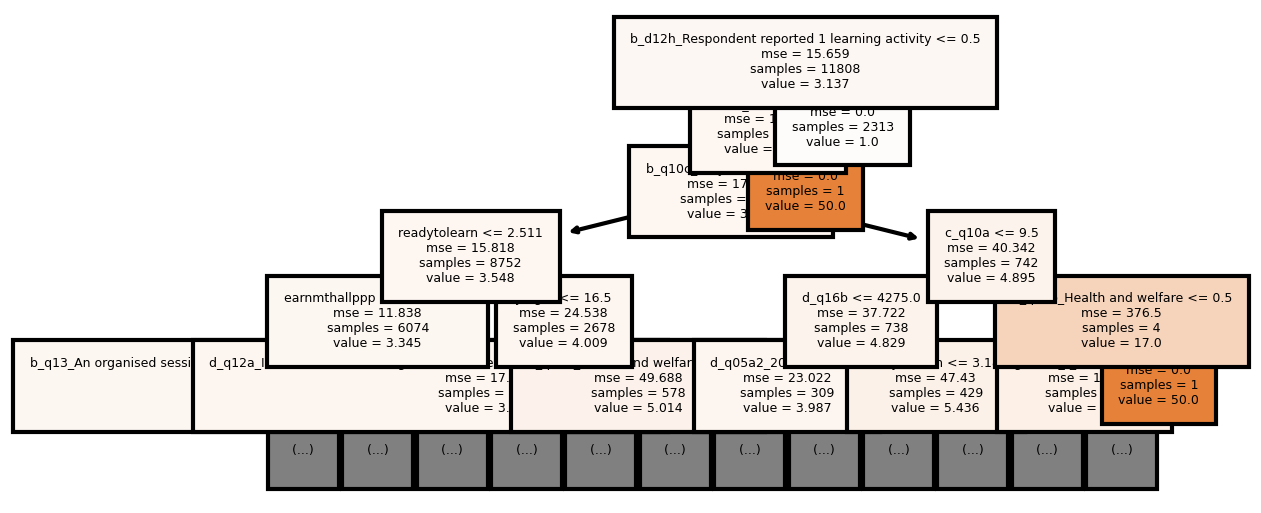

In [93]:
# put here the parameter for ccp_alpha that you determined in the previous step 

cart = tree.DecisionTreeRegressor( ccp_alpha = results['Test Score'].idxmin(), random_state = 1)
cart = cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)

# try to change the parameters and check how the OOS performance changes
# Out-of-sample R-sq.
print('Tree depth: %.0f' % cart.get_depth())
print('Out-of-sample Rsq: %.3f'
      % r2_score(y_test, y_pred))
print('Out-of-sample MSE: %.3f'
      % mean_squared_error(y_test, y_pred))

#dendrogram
plt.rcParams.update({'font.size': 8, 'figure.figsize': (4, 2), 'figure.dpi': 300})
tree.plot_tree(cart, max_depth = 5, filled = True, feature_names = list(X.columns),\
               fontsize = 3);